In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\SGI\Downloads\day.csv")

In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape

(730, 16)

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Checking percentage of null values for each column in the dataset

In [8]:
print((df.isnull().sum()/df.shape[0])*100)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


## By looking at the above printed values we can say that there are no missing values for any column in the provided dataset

## By going through the provided data dictionary we need to drop columns named "casual" and "registered" as "cnt" column is our target column and both the columns that we are dropping cannot be considered as a feature for determining "cnt" column

In [9]:
df.drop(["casual","registered"],axis=1,inplace=True)

In [10]:
df.shape

(730, 14)

## We also need to drop the dteday(date) column as columns like yr, month, weekday already contain the derived information from dteday column

In [11]:
df.drop(["dteday"],axis=1,inplace=True)

In [12]:
df.shape

(730, 13)

## By looking a the dataset and the dictionary we need to convert season, weathersit, weekday and mnth features into categorical string values

In [13]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
df["season"] = df["season"].apply(lambda x: "spring" if x==1 else "summer" if x==2 else "fall" if x==3 else "winter")

In [15]:
df["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [16]:
df["weathersit"].unique()

array([2, 1, 3], dtype=int64)

In [17]:
df["weathersit"] = df["weathersit"].apply(lambda x: "Clear or less cloudy" if x==1 else "Mist" if x==2 else "light snow \
or light rain" if x==3 else "Heavy Rain and ice pallets or snow and fog")

In [18]:
df["weathersit"].unique()

array(['Mist', 'Clear or less cloudy', 'light snow or light rain'],
      dtype=object)

In [19]:
df["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [20]:
df["weekday"] = df["weekday"].apply(lambda x: "Weekday_0" if x==0 else "Weekday_1" if x==1 else "Weekday_2" if x==2 \
else "Weekday_3" if x==3 else "Weekday_4" if x==4 else "Weekday_5" if x==5 else "Weekday_6")

In [21]:
df["weekday"].unique()

array(['Weekday_6', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5'], dtype=object)

In [22]:
df["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [23]:
df["mnth"] = df["mnth"].apply(lambda x: "Month_1" if x==1 else "Month_2" if x==2 else "Month_3" if x==3 else "Month_4" \
if x==4 else "Month_5" if x==5 else "Month_6" if x==6 else "Month_7" if x==7 else "Month_8" if x==8 else "Month_9" if x==9 \
else "Month_10" if x==10 else "Month_11" if x==11 else "Month_12")

In [24]:
df["mnth"].unique()

array(['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'], dtype=object)

## Also for the yr (year) column we need to map the column value back to its original value

In [25]:
df["yr"].unique()

array([0, 1], dtype=int64)

In [26]:
df["yr"] = df["yr"].apply(lambda x: 2018 if x==0 else 2019 )

In [27]:
df["yr"].unique()

array([2018, 2019], dtype=int64)

# Data Visualization

In [28]:
df.nunique()

instant       730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

## From above figures we can segregate the entire columns into 2 sets one belonging to numerical feature and another categorical features.

In [29]:
num = ["instant", "temp", "atemp", "hum", "windspeed", "cnt"]
cat = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

In [30]:
##Importing required libraries for visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

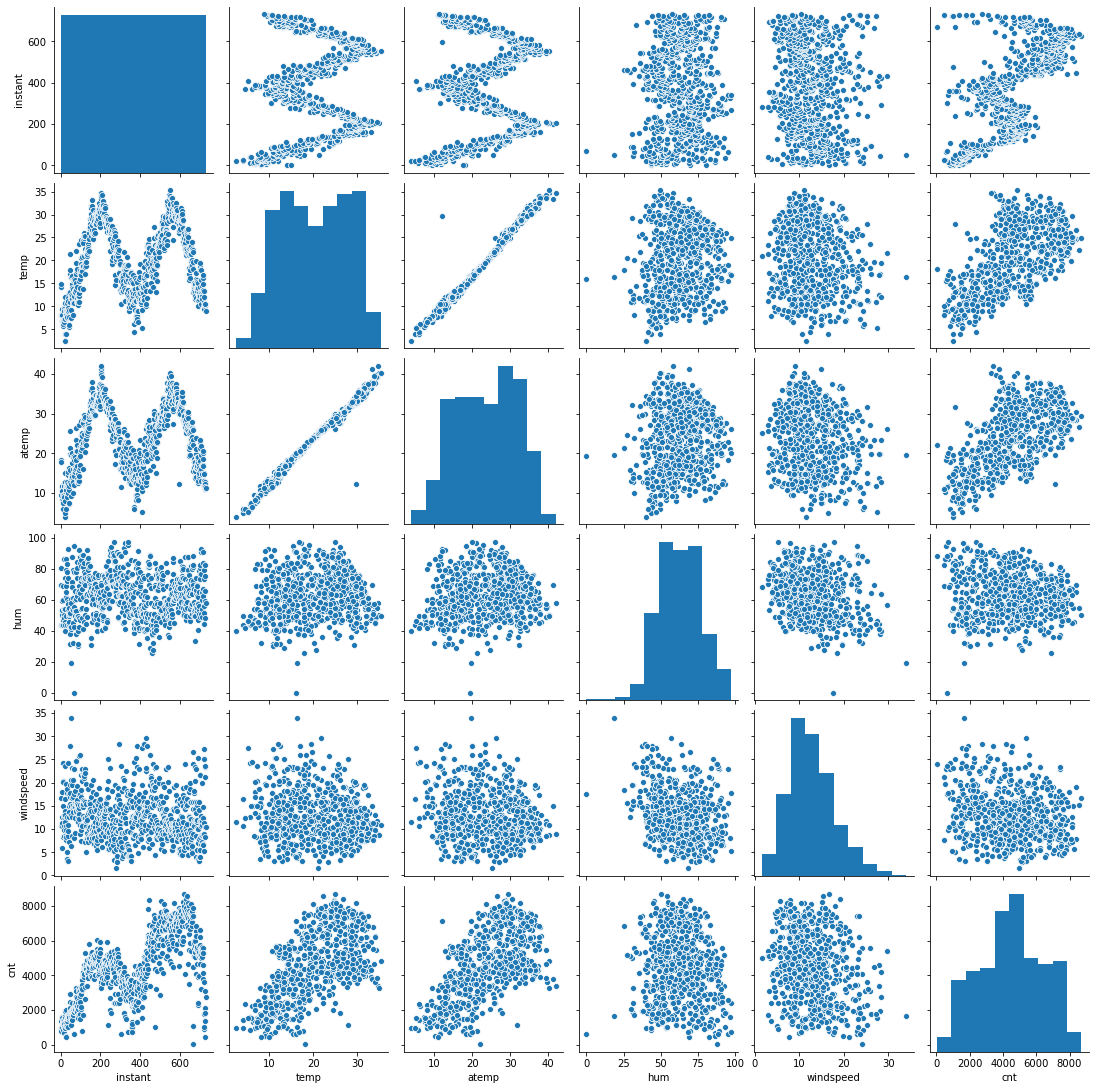

In [32]:
sns.pairplot(df[num], height=2.5)
plt.show()

## By looking at the above pairplot we can say that the target variable cnt has almost a linear relationship with both temp variable and atemp variable, but with other variables target variable does not follow a linear relationship

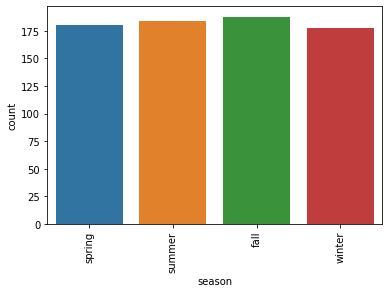

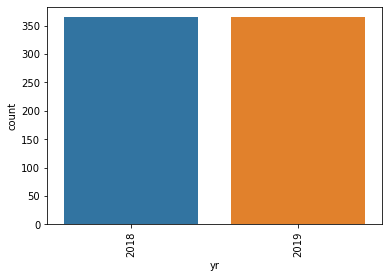

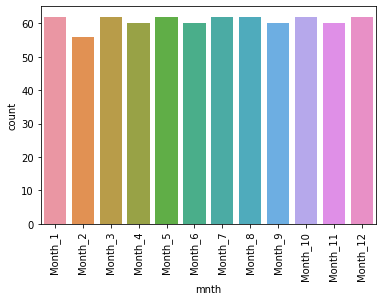

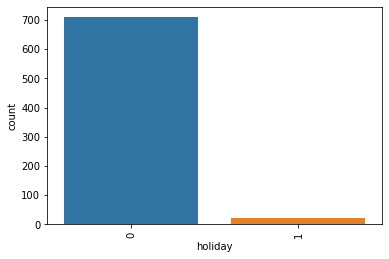

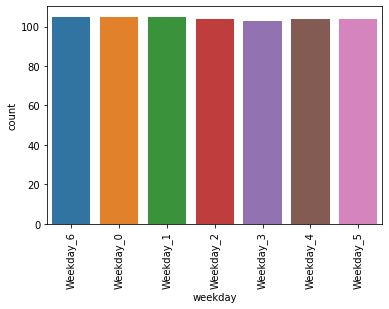

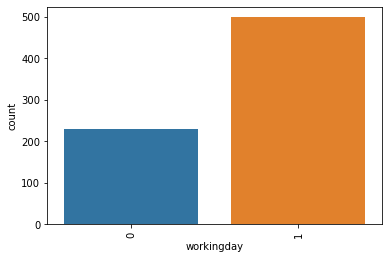

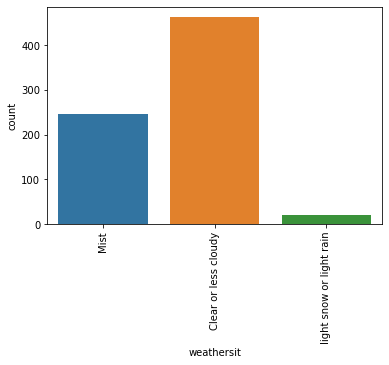

In [33]:
for i in cat: 
    sns.countplot(x=df[i])
    plt.xticks(rotation=90)
    plt.show()

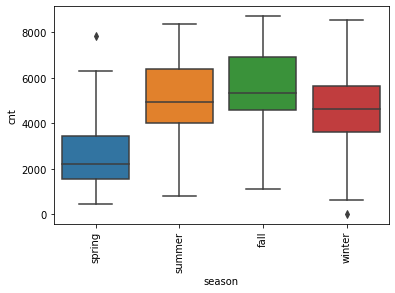

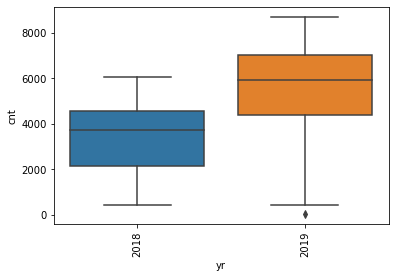

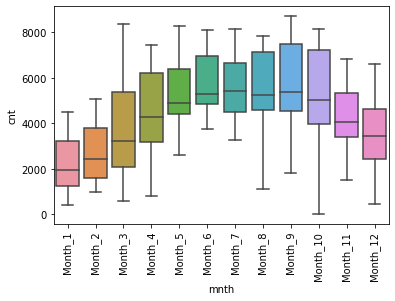

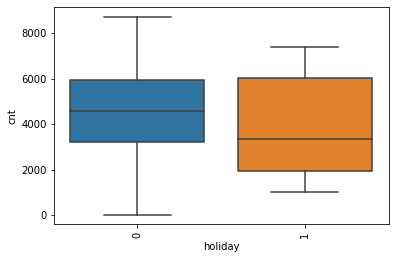

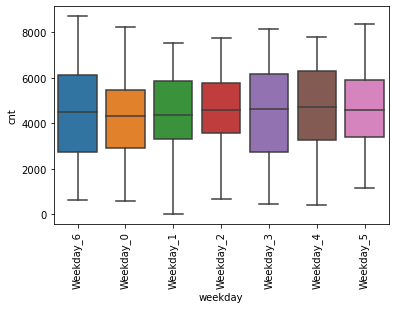

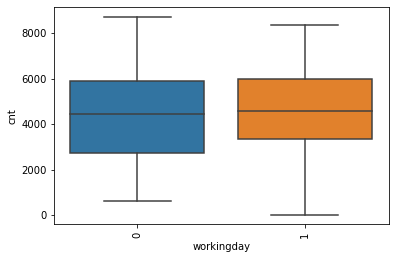

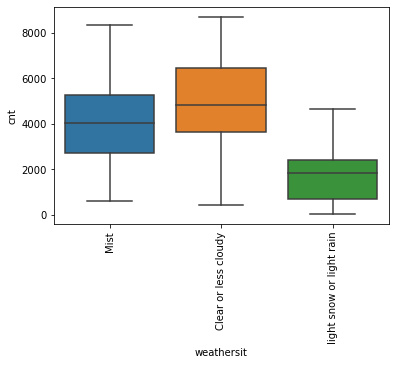

In [34]:
for i in cat:
    sns.boxplot(x = i, y = "cnt", data = df)
    plt.xticks(rotation=90)
    plt.show()

## From above visualizations for categorical values we can say that total count of bike rentals that is the cnt variable is highest in fall season. Also in year 2019 the total number of bike rentals per day were much higher than in 2018. Also in September month the total number of bike rentals per day are higher in comparison to other months. Also on a clear or less cloudy day the total number of bike rentals per day were the highest in comparison to other weather situations.

## Data Preparation (Scaling)

In [35]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,2018,Month_1,0,Weekday_6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,2018,Month_1,0,Weekday_0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,2018,Month_1,0,Weekday_1,1,Clear or less cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,2018,Month_1,0,Weekday_2,1,Clear or less cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,2018,Month_1,0,Weekday_3,1,Clear or less cloudy,9.305237,11.46350,43.6957,12.522300,1600


### We need to create dummy variables for the weathersit and  season column

In [36]:
# Let's create the dummy variables with new n-1 columns for n unique features present in weathersit column 
#by dropping the first column using 'drop_first = True'

weathersit = pd.get_dummies(df['weathersit'], drop_first = True)

In [37]:
weathersit.head()

,Mist,light snow or light rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [38]:
# Add the results to the original df dataframe

df = pd.concat([df, weathersit], axis = 1)

# Drop the weathersit column as we have created the dummy variables for it
df.drop(['weathersit'], axis = 1, inplace = True)

In [39]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Mist,light snow or light rain
0,1,spring,2018,Month_1,0,Weekday_6,0,14.110847,18.18125,80.5833,10.749882,985,1,0
1,2,spring,2018,Month_1,0,Weekday_0,0,14.902598,17.68695,69.6087,16.652113,801,1,0
2,3,spring,2018,Month_1,0,Weekday_1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,4,spring,2018,Month_1,0,Weekday_2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,5,spring,2018,Month_1,0,Weekday_3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [40]:
# Similarly creating dummy variables for season column
season = pd.get_dummies(df['season'], drop_first = True)
# Add the results to the original df dataframe
df = pd.concat([df, season], axis = 1)
# Drop the season column as we have created the dummy variables for it
df.drop(['season'], axis = 1, inplace = True)

In [41]:
df.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Mist,light snow or light rain,spring,summer,winter
0,1,2018,Month_1,0,Weekday_6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,1,0,0
1,2,2018,Month_1,0,Weekday_0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,1,0,0
2,3,2018,Month_1,0,Weekday_1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,4,2018,Month_1,0,Weekday_2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,5,2018,Month_1,0,Weekday_3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [42]:
# Similarly creating dummy variables for mnth column
month = pd.get_dummies(df['mnth'], drop_first = True)
# Add the results to the original df dataframe
df = pd.concat([df, month], axis = 1)
# Drop the mnth column as we have created the dummy variables for it
df.drop(['mnth'], axis = 1, inplace = True)
df.head()

,instant,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
0,1,2018,0,Weekday_6,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,2,2018,0,Weekday_0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,3,2018,0,Weekday_1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,4,2018,0,Weekday_2,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,5,2018,0,Weekday_3,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df.columns

Index(['instant', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'Mist', 'light snow or light rain', 'spring',
       'summer', 'winter', 'Month_10', 'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9'],
      dtype='object')

In [44]:
# Similarly creating dummy variables for weekday column
weekday = pd.get_dummies(df['weekday'], drop_first = True)
# Add the results to the original df dataframe
df = pd.concat([df, weekday], axis = 1)
# Drop the weekday column as we have created the dummy variables for it
df.drop(['weekday'], axis = 1, inplace = True)
df.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,...,Month_6,Month_7,Month_8,Month_9,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,1,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,1
1,2,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,4,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
df.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'Mist', 'light snow or light rain', 'spring',
       'summer', 'winter', 'Month_10', 'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')

In [46]:
len(df.columns)

31

## Splitting the data into training and testing set

In [47]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

## Rescaling the Features using Min-Max Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
df.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'Mist', 'light snow or light rain', 'spring',
       'summer', 'winter', 'Month_10', 'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6'],
      dtype='object')

In [51]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['instant', 'yr', 'temp', 'atemp', 'hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [52]:
df_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,...,Month_6,Month_7,Month_8,Month_9,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
367,0.503429,1.0,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,0,...,0,0,0,0,0,1,0,0,0,0
648,0.888889,1.0,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,...,0,0,0,0,0,0,0,1,0,0
44,0.060357,0.0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,0,...,0,0,0,0,1,0,0,0,0,0
705,0.967078,1.0,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,1,...,0,0,0,0,0,0,0,0,1,0
379,0.519890,1.0,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,...,Month_6,Month_7,Month_8,Month_9,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.507512,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.515792,0.342466,...,0.077055,0.075342,0.090753,0.080479,0.148973,0.133562,0.154110,0.135274,0.123288,0.150685
std,0.289935,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.225336,0.474941,...,0.266907,0.264169,0.287504,0.272267,0.356367,0.340472,0.361363,0.342309,0.329049,0.358048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256173,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.513717,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.758916,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X and Y sets for the model building

In [54]:
y_train = df_train.pop('cnt')
X_train = df_train

## Using RFE for selection of variables for model building

In [55]:
len(X_train.columns)

30

In [56]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
# Running RFE with the output number of the variable equal to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 5),
 ('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mist', True, 1),
 ('light snow or light rain', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('Month_10', True, 1),
 ('Month_11', False, 7),
 ('Month_12', False, 8),
 ('Month_2', False, 9),
 ('Month_3', True, 1),
 ('Month_4', True, 1),
 ('Month_5', True, 1),
 ('Month_6', False, 2),
 ('Month_7', False, 6),
 ('Month_8', False, 3),
 ('Month_9', True, 1),
 ('Weekday_1', False, 12),
 ('Weekday_2', False, 13),
 ('Weekday_3', False, 15),
 ('Weekday_4', False, 16),
 ('Weekday_5', False, 14),
 ('Weekday_6', True, 1)]

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'Mist',
       'light snow or light rain', 'spring', 'winter', 'Month_10', 'Month_3',
       'Month_4', 'Month_5', 'Month_9', 'Weekday_6'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index(['instant', 'holiday', 'atemp', 'summer', 'Month_11', 'Month_12',
       'Month_2', 'Month_6', 'Month_7', 'Month_8', 'Weekday_1', 'Weekday_2',
       'Weekday_3', 'Weekday_4', 'Weekday_5'],
      dtype='object')

## Building model using the selected columns using statsmodels library

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_new = X_train[col]

In [62]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)

In [63]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [64]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     214.0
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.35e-222
Time:                        00:04:27   Log-Likelihood:                 595.43
No. Observations:                 584   AIC:                            -1159.
Df Residuals:                     568   BIC:                            -1089.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Function for calculating the VIF values
def calculate_vif(X_train_new):
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [66]:
print(calculate_vif(X_train_new))

                    Features    VIF
3                        hum  26.77
2                       temp  15.74
4                  windspeed   4.77
1                 workingday   4.49
7                     spring   3.61
8                     winter   3.53
5                       Mist   2.29
0                         yr   2.10
14                 Weekday_6   1.77
9                   Month_10   1.68
11                   Month_4   1.45
12                   Month_5   1.40
10                   Month_3   1.26
6   light snow or light rain   1.24
13                   Month_9   1.24


### Drop column hum as its vif is very much above the cutoff of 5

In [67]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### Rebuilding the model without hum column

In [68]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     221.3
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.80e-219
Time:                        00:04:28   Log-Likelihood:                 586.14
No. Observations:                 584   AIC:                            -1142.
Df Residuals:                     569   BIC:                            -1077.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [69]:
print(calculate_vif(X_train_new))

                    Features   VIF
2                       temp  5.67
3                  windspeed  4.75
1                 workingday  4.41
7                     winter  2.25
6                     spring  2.19
0                         yr  2.09
13                 Weekday_6  1.76
8                   Month_10  1.66
4                       Mist  1.55
10                   Month_4  1.34
11                   Month_5  1.28
9                    Month_3  1.26
12                   Month_9  1.22
5   light snow or light rain  1.09


### Drop column temp as its Vif is above the cutoff of 5

In [70]:
X_train_new = X_train_new.drop(["temp"], axis = 1)

In [71]:
X_train_new.columns

Index(['yr', 'workingday', 'windspeed', 'Mist', 'light snow or light rain',
       'spring', 'winter', 'Month_10', 'Month_3', 'Month_4', 'Month_5',
       'Month_9', 'Weekday_6'],
      dtype='object')

### Rebuilding the model without temp column

In [72]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     163.0
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.01e-182
Time:                        00:04:28   Log-Likelihood:                 495.11
No. Observations:                 584   AIC:                            -962.2
Df Residuals:                     570   BIC:                            -901.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [73]:
print(calculate_vif(X_train_new))

                    Features   VIF
2                  windspeed  3.90
1                 workingday  3.18
6                     winter  2.16
0                         yr  1.89
5                     spring  1.86
7                   Month_10  1.63
3                       Mist  1.54
12                 Weekday_6  1.50
9                    Month_4  1.32
8                    Month_3  1.26
10                   Month_5  1.26
11                   Month_9  1.16
4   light snow or light rain  1.08


### Dropping column Month_5 as its p value is very much above the cutoff of 0.05

In [74]:
X_train_new = X_train_new.drop(["Month_5"], axis = 1)

In [75]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     176.8
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.52e-183
Time:                        00:04:28   Log-Likelihood:                 494.97
No. Observations:                 584   AIC:                            -963.9
Df Residuals:                     571   BIC:                            -907.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [76]:
print(calculate_vif(X_train_new))

                    Features   VIF
2                  windspeed  3.79
1                 workingday  3.06
6                     winter  2.06
0                         yr  1.89
5                     spring  1.73
7                   Month_10  1.63
3                       Mist  1.52
11                 Weekday_6  1.49
9                    Month_4  1.26
8                    Month_3  1.24
10                   Month_9  1.14
4   light snow or light rain  1.08


### Dropping column Month_3 as it has p value above the cutoff of 0.05

In [77]:
X_train_new = X_train_new.drop(["Month_3"], axis = 1)

In [78]:
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     191.9
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          8.72e-184
Time:                        00:04:29   Log-Likelihood:                 493.34
No. Observations:                 584   AIC:                            -962.7
Df Residuals:                     572   BIC:                            -910.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [79]:
print(calculate_vif(X_train_new))

                    Features   VIF
2                  windspeed  3.75
1                 workingday  3.03
6                     winter  2.04
0                         yr  1.89
5                     spring  1.66
7                   Month_10  1.63
3                       Mist  1.52
10                 Weekday_6  1.49
8                    Month_4  1.25
9                    Month_9  1.13
4   light snow or light rain  1.08


### This is the final model as the p value and Vif of all the variables is below the cutoff. Also from the summary printed the model has a nice R squared score of 0.787 on the training dataset and adjusted R squared score of 0.783

## Residual Analysis of the train data

In [80]:
y_train_price = lm.predict(X_train_rfe)

In [81]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

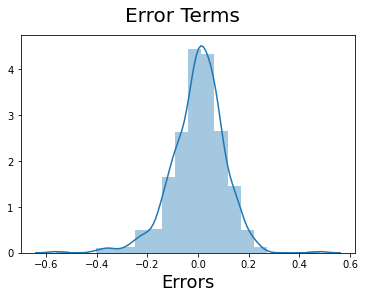

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### From the above Histogram we can say that the error terms are normally distributed with a mean of 0

## Making Predictions

### Applying the scaling on the test set

In [83]:
X_train_new.columns

Index(['yr', 'workingday', 'windspeed', 'Mist', 'light snow or light rain',
       'spring', 'winter', 'Month_10', 'Month_4', 'Month_9', 'Weekday_6'],
      dtype='object')

In [84]:
print(num_vars)
df_test[num_vars] = scaler.transform(df_test[num_vars])

['instant', 'yr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [85]:
df_test[num_vars]

,instant,yr,temp,atemp,hum,windspeed,cnt
184,0.252401,0.0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.733882,1.0,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.410151,0.0,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.303155,0.0,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.208505,0.0,0.817246,0.741471,0.314298,0.537414,0.569029
...,...,...,...,...,...,...,...
219,0.300412,0.0,0.879548,0.819364,0.610133,0.322193,0.495168
719,0.986283,1.0,0.333364,0.292320,0.573637,0.713904,0.414289
3,0.004115,0.0,0.175530,0.174649,0.608434,0.253659,0.177174
392,0.537723,1.0,0.319864,0.324627,0.559896,0.362295,0.460308


In [86]:
# Dropping columns not used in training the final model
df_test = df_test[['yr', 'workingday', 'windspeed', 'Mist', 'light snow or light rain',
       'spring', 'winter', 'Month_10', 'Month_4', 'Month_9', 'Weekday_6','cnt']]

### Dividing into X_test and y_test

In [87]:
y_test = df_test.pop('cnt')
X_test = df_test

In [88]:
# Making predictions
X_test = sm.add_constant(X_test)
y_pred = lm.predict(X_test)

## Model Evaluation

Text(0, 0.5, 'y_pred')

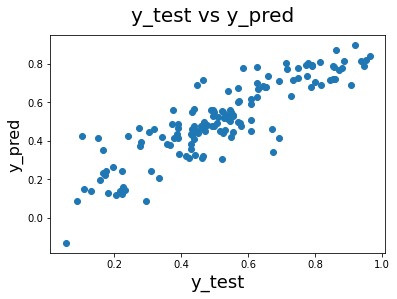

In [89]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [90]:
from sklearn.metrics import r2_score

In [91]:
r2_score(y_test, y_pred)

0.7566297929247979

## R-squared score for the model on the test dataset is 0.756 which is quite near to the R-squared score of 0.787 on the training dataset so we can say that the model is performing as expected on the test dataset as it performed on the training dataset.